## Pseudo Random Number Generator

Let us learn about how to generate a random number.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

#### 1) Linear Congruent
One of the easiest way to make random number is using linear congruential.

$$x_{n+1} = a x_{n} + b \mod 2^{31}$$

pick a random $a$ and $b$ then try.

In [3]:
a = 1664525
b = 1013904223
x = 1239

for i in range(2000):
    x = (a*x + b)%(2**32)


#### 2) Cycle Problem

One of the problem with linear congruent is short cycle length. For example,

$$x_{n+1} =  ax_{n} + b \mod 11$$

No matter what value you give $a$ and $b$. Your cycle length will be at most 11.

#### 3) Fixing Cycle problem

One way to do it is to generate it with a better cycle and then mod 11.

#### 4) Some available random number from numpy/python

`np.random.random` for random a float uniformly between 0 and 1.

`np.random.randint` for random integer uniformly in some range.

`np.random.randn` for random float from normal distribution with mean 0 and standard deviation 1.

In [19]:
from numpy.random import random, randint, randn
random()

0.8485590340886012

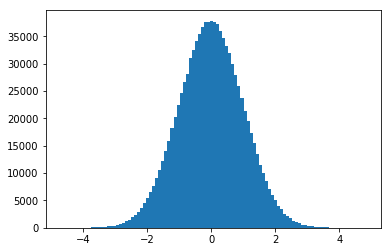

In [34]:
# randint(0,1000)
xs = np.random.randn(1000000)
plt.hist(xs,bins=100);

#### 5) Manipulating random number to get desired behavior.

Random a float from 0 to 5.

Random a float from -1 to 1.

Random a float form normal distribution with mean 5 and std dev 1.

Random a float form normal distribution with mean 2 and std dev 10.

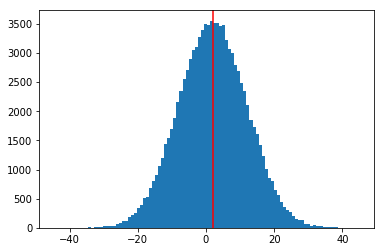

In [67]:
def randFive():
    return random()*5

r1 = randFive()

def randMinusPlusOne():
    return random()*2-1

r2 = randMinusPlusOne()

def distribution(stdDev,mean):
    return randn(100000)*stdDev + mean

r4 = distribution(10,2)

plt.hist(r4,bins=100);
plt.axvline(2,c='r');

6) What does np.random.seed do?

In [71]:
np.random.seed(2184390)
np.random.random(5)

array([ 0.75091355,  0.53510262,  0.347295  ,  0.78739807,  0.14631122])

In [72]:
np.random.random(5)

array([ 0.8631029 ,  0.73906592,  0.29887506,  0.76373186,  0.79481529])

### Monte Carlo Integration

#### 1) Let integrate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2e^{(xyz)} \; dx \; dy \; dz$$
Over a cube $x \in [-1,1], y\in [-1,1], z\in [-1,1]$

In [78]:
n = 10000000
x = np.random.random(n)*2-1
y = np.random.random(n)*2-1
z = np.random.random(n)*2-1
# Volume = rangeX * rangeY * rangeZ = 2x2x2 = 8
f = np.sum(x**2*(y-1)**2*(z-2)**2*np.exp(x*y*z))*8/n
print(f)

16.0842011299


#### 2) Evaluate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a sphere of radius 1 centered at the origin.

In [84]:
n = 100000
ret=0.

#every point in the sphere must <= radius
for i in range(n):
    x,y,z = np.random.random(3)*2-1
    # check if in circle
    if ((x**2+y**2+z**2) <= 1.):
        ret += x**2*(y-1)**2*(z-2)**2*math.exp(x*y*z)
print (ret*8./n)

3.96085566501


3) Do we guarantee to get the same answer when we repeat the experiment?

In [88]:
#no

4) What do we need to do to guarantee the same answer?

In [89]:
#seed

5) How do we defind the convergence and how fast is the convergence for monte carlo integration?

## Monte Carlo Simulations

### Loaded Die.

<table>
<tr style="text-align:center">
    <td>Number</td>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
</tr>
<tr style="text-align:center">
    <td>Probability</td>
    <td>0.3</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.2</td>
    <td>0.1</td>
    <td>0.1</td>
</tr>
</table>

#### 1) Simulating the dice.

Simulate the dice result such that it has the given probability distribution.

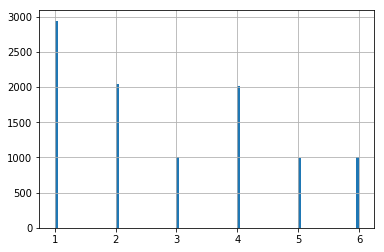

In [120]:
def dice():
    x = np.random.rand()
    if(x<0.3):
        return 1
    elif(x<0.5):
        return 2
    elif(x<0.6):
        return 3
    elif(x<0.8):
        return 4
    elif(x<0.9):
        return 5
    else:
        return 6

dx = [dice() for i in range(10000)]
plt.hist(dx,bins=100);
plt.grid(True)

#### 2) Expected Value.

What is the expected value of dice result? Try both simulation and analytical formula.

In [122]:
n = 10000
d = sum(dice() for i in range(n))/float(n)
print(d)

2.9083


3) What is the expected value of $A+B$ where $A$ is the result of the first dice and $B$ is the result of the second dice? Use simulation and compare with analytic answer.

In [123]:
n = 10000
d = sum(dice()+dice() for i in range(n))/float(n)
print(d)

5.7563


4) What is the expected value of $AB$?

In [124]:
n = 10000
d = sum(dice()*dice() for i in range(n))/float(n)
print(d)

8.5343


5) Try the experiment 10,000 times and plot out the probability of getting each result for $AB$. (Probability is given by #of times we get the number/total number of experiment.

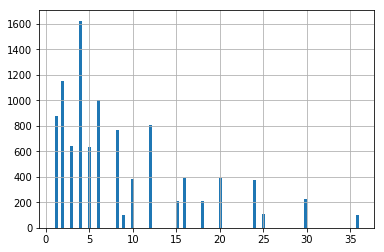

In [127]:
x = [dice()*dice() for i in range(10000)]
plt.hist(x,bins=100);
plt.grid(True)

6) Now we play the games of two people. We take the product of the two dice. Whoever get more number wins. What is the probability of getting a draw.

In [131]:
def draw():
    n = 0.
    r = 10000
    for i in range(r):
        a = dice()*dice()
        b = dice()*dice()
        if(a==b):
            n += 1
    return n/r

print(draw())

0.0824


7) A little bit harder: consider the game of product dice. If our first dice is 3, what is the probability of winning?

In [132]:
def draw2():
    n = 0.
    r = 10000
    for i in range(r):
        a = 3*dice()
        b = dice()*dice()
        if(a>b):
            n+=1
    return n/r

print(draw2())

0.536


### Geometric Brownian Motion.

One popular way to simulate stock is using geometric brownian motion. Stockprice at $t+dt$ is related to the stock price at time $t$ by

$$s(t+dt) = s(t) + s(t)(\mu dt + \epsilon\sigma \sqrt{dt}) $$

where
1. $\mu$ is the mean rate of return. Typically quote as $\%$ per year.
2. $\epsilon$ is a normally distributed random variable with mean 0 and variance of 1.
3. $\sigma$ is called volatility. It typically quoted as $\%$ per $\sqrt{\text{year}}$. It represent how wildly stock can go.

To use this formula, we need to make sure the unit for $t$ is correct. Normally just convert it to year

All these number can be looked up from the internet (you can calculate one yourself from historical data too). 

Here is one example: google for aapl volatility.

The funny unit of $\sqrt{t}$ has to do with scaling behavior. You can read it in the lecture notes.

1) Given the volatility($\sigma$) of $28\%$ per $\sqrt{\text{year}}$ and mean rate of return $8.77\%$. The stock today is 119.21$. Write a function to generate the price for tomorrow given the price today.

In [150]:
def tmr(curPrice,mu,sigma):
    dt = 1/252.
    e = np.random.randn()
    return curPrice + curPrice*(mu*dt + e*sigma*dt**0.5)

tmr(119.21,0.0877,0.28)

124.52548281513666

2) Generate the price for 1 trading year(all the time we said year it actually means trading year). Have dt = 1 day. 1 Trading year is actually 252 day.

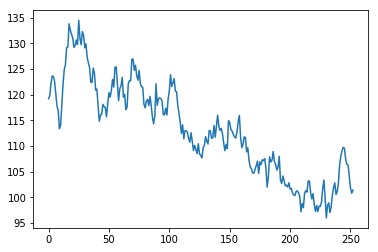

In [190]:
def price_simu(price,mu,sigma):
    ans = [price]
    for i in range(252):
        price = tmr(price,mu,sigma)
        ans.append(price)
    return ans

rs = price_simu(119.21,0.0877,0.28)
plt.plot(rs)

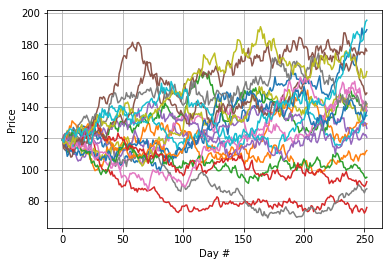

In [191]:
# expected = np.array([price_simu(119.21,0.0877,0.28) for i in range(10000)])

for i in range(20):
    plt.plot(expected[i])
    
plt.xlabel("Day #")
plt.ylabel("Price")
plt.grid(True)

3) What is the expected value of the stock at the end of year?

130.094380454


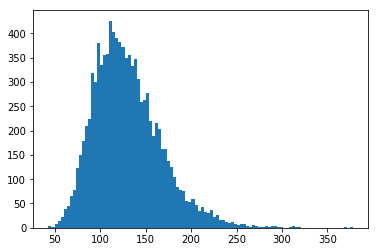

In [192]:
mmean = 0
for i in range(10000):
    #expected[i][-1] = last day of each year
    mmean += expected[i][-1]
print( mmean/10000.)

s = []
for i in range(len(expected)):
    s.append(expected[i][-1])

plt.hist(s,bins=100);

In [203]:
print(np.average(s))
print(np.var(s))

130.094380454
1381.13937491


4) What is the variance of the stock at the end of the year?

In [193]:
mmean = 0
mmeansqr = 0
for i in range(10000):
    mmean += expected[i][-1]
    mmeansqr += expected[i][-1]**2
    
print( mmeansqr/10000.-(mmean/10000.)**2)

1381.13937491


5) What is the probability that the price of the stock will dip below 70 at anytime of the year?

In [197]:
count = 0.
for i in range(10000):
    for j in range(len(expected[i])):
        if(expected[i][j] < 70):
            count += 1
            break

print(count/10000.)

0.0377


6) What is the proabability that th stock will dip below 100 and come back to 110 within a year? 

In [201]:
count = 0.
for i in range(10000-1):
    dipped = False
    back = False
    for j in range(len(expected[i])):
        if(not dipped):
            if(expected[i][j] < 100):
                dipped = True
        elif(not back):
            if(expected[i][j] >= 110):
                back = True
        
        if(dipped and back):
            count += 1
            break
            
print(count/10000.)

0.2697


### Hill Climbing

### Biggest Triangle.
Let us consider the problem of finding the triangle with maximum area from given 500 points.

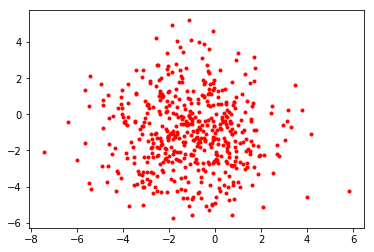

In [56]:
np.random.seed(13)
n = 500
x = np.random.randn(n)*2-1
y = np.random.randn(n)*2-1
plt.plot(x,y,'.r')

55.0249594006 5000


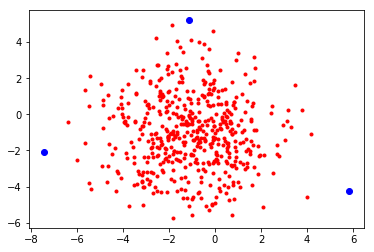

In [64]:
def rand_index():
    return np.random.randint(0,500)

def mutate(cs):
    n = len(cs)
    index_to_change =np.random.randint(n)
    ret = [c for c in cs]
    ret[index_to_change] = rand_index()
    return ret

def area(sol):
    return triarea(
        x[sol[0]],y[sol[0]],
        x[sol[1]],y[sol[1]],
        x[sol[2]],y[sol[2]]
        )

cs =  [rand_index() for i in range(3)]

best_area = area(cs)
count = 0
for i in range(5000):
    new_sol = mutate(cs)
    new_area = area(new_sol)
    count+=1;
    if(new_area>best_area):
        best_area = new_area
        cs = new_sol
print(best_area,count)

plt.plot(x,y,'.r')
for c in cs:
    plt.plot(x[c],y[c],'ob')

### Scheduling Exam

Give classes and the intersection of students. Find a decent scheduling under 15 slot for 70 classes. Number of student taking both class `i` and class `j` can be found using `student[i][j]`.

[[ 0 67 64 ..., 62 22 60]
 [67  0 22 ..., 40 68 66]
 [64 22  0 ...,  0  0  0]
 ..., 
 [62 40  0 ...,  0 59 43]
 [22 68  0 ..., 59  0  0]
 [60 66  0 ..., 43  0  0]]


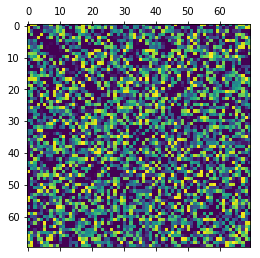

In [78]:
nclass = 70
student = np.random.randint(0,100,(nclass, nclass))

np.random.seed(222)
for i in range(nclass-1):
    for j in range(i+1,nclass):
        student[i,j] = student[j,i]

for i in range(nclass):
    student[i,i] = 0 
    
student[student>70] = 0

print(student)
plt.matshow(student)

In [90]:
#Student[i,j] = # student take both bubject i and j

def count_conflict(sch):
    con = 0
    for i in range(len(sch)):
        for j in range(i,len(sch)):
            if(sch[i] == sch[j]):
                con += student[i,j]
    return con

def mutate(sch):
    n = len(sch)
    rand_ind = np.random.randint(n)
    ret = [sc for sc  in sch]
    ret[rand_ind] = np.random.randint(15)
    return ret

def optimize():
    nclass,_ = student.shape
    schedule = [np.random.randint(15) for i in range(70)]  
    for i in range(20000):
        new_sch = mutate(schedule)
        if(count_conflict(new_sch) < count_conflict(schedule)):
            schedule = new_sch
    return schedule,count_conflict(schedule)

print(optimize()[1])

191


### Simulated Annealing

1) What's wrong with Hill Climbing?

2) What is the main idea for fixing that?

3) Implement the exam scheduling again with Simulated Annealing